In [1]:
import pandas as pd

# Dataset Information
### This dataset contains the data of 10 cars in the CARLA simulation environment, with the features as shown below.

In [2]:
df = pd.read_csv('vehicle_data.csv')

In [3]:
df.head()

,timestamp,vehicle_id,gear,throttle,speed,acceleration,max_rpm,gear_ratio,wheel_radius,engine_rpm,inclination,tyre_pressure,odometer,fuel_consumed,ignition_status,engine_oil_life,new_battery_percent
0,1.708225e+09,0,0,0.85,1.061667,25.723619,6300.0,3.450,0.33,30.737318,0.068042,"(0, 0, 0, 0)",0.000000,0.000000e+00,True,100.000000,99.998069
1,1.708225e+09,1,0,0.85,0.816886,28.389420,4700.0,3.769,0.34,22.954825,0.000000,"(0, 0, 0, 0)",0.000000,0.000000e+00,True,100.000000,99.997473
2,1.708225e+09,0,0,0.85,0.274378,0.511369,6300.0,3.450,0.33,7.943773,0.136481,"(0, 0, 0, 0)",0.029130,5.490478e-06,True,99.999999,99.996138
3,1.708225e+09,1,0,0.85,0.239636,0.081476,4700.0,3.769,0.34,6.733879,0.000000,"(0, 0, 0, 0)",0.006514,4.736946e-07,True,100.000000,99.994946
4,1.708225e+09,0,0,0.85,0.076758,0.820615,6300.0,3.450,0.33,2.222298,0.082611,"(0, 0, 0, 0)",0.062866,1.507606e-05,True,99.999999,99.994207


In [4]:
df = df[df["vehicle_id"] == 0]

In [5]:
df.head()

,timestamp,vehicle_id,gear,throttle,speed,acceleration,max_rpm,gear_ratio,wheel_radius,engine_rpm,inclination,tyre_pressure,odometer,fuel_consumed,ignition_status,engine_oil_life,new_battery_percent
0,1.708225e+09,0,0,0.85,1.061667,25.723619,6300.0,3.45,0.33,30.737318,0.068042,"(0, 0, 0, 0)",0.000000,0.000000,True,100.000000,99.998069
2,1.708225e+09,0,0,0.85,0.274378,0.511369,6300.0,3.45,0.33,7.943773,0.136481,"(0, 0, 0, 0)",0.029130,0.000005,True,99.999999,99.996138
4,1.708225e+09,0,0,0.85,0.076758,0.820615,6300.0,3.45,0.33,2.222298,0.082611,"(0, 0, 0, 0)",0.062866,0.000015,True,99.999999,99.994207
6,1.708225e+09,0,1,0.85,1.681097,5.602935,6300.0,2.10,0.33,401.681974,0.610148,"(0, 0, 0, 0)",0.251549,0.000055,True,99.999994,99.992276
8,1.708225e+09,0,1,0.85,2.274781,2.170914,6300.0,2.10,0.33,543.537085,0.467403,"(0, 0, 0, 0)",0.658497,0.000090,True,99.999985,99.990345


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
X = df[["speed", "throttle", "acceleration"]]

In [8]:
y = df["gear"]


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
rfc = RandomForestClassifier(n_estimators=100)

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
predictions = rfc.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

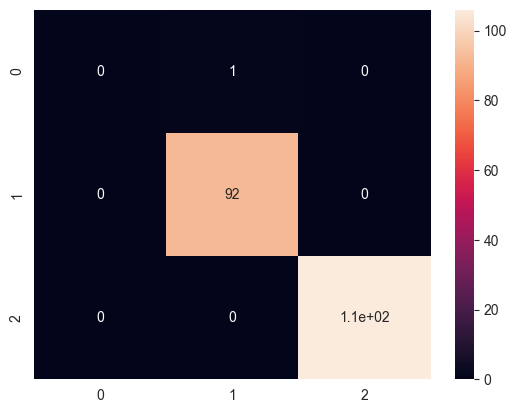

In [44]:
# plot the matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [45]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        92
           2       1.00      1.00      1.00       106

    accuracy                           0.99       199
   macro avg       0.66      0.67      0.66       199
weighted avg       0.99      0.99      0.99       199


In [46]:
# accuracy
print("Accuracy of RFC:", rfc.score(X_test, y_test))

Accuracy of RFC: 0.9949748743718593


# Conclusion
### We have trained a Random Forest Classifier to predict the current gear of the vehicle with 99% accuracy.

In [19]:
# multilayer perceptron
from sklearn.neural_network import MLPClassifier

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [21]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [22]:
predictions = mlp.predict(X_test)

<Axes: >

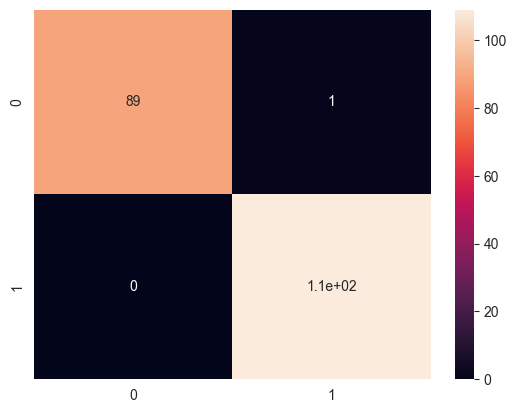

In [23]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [24]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        90
           2       0.99      1.00      1.00       109

    accuracy                           0.99       199
   macro avg       1.00      0.99      0.99       199
weighted avg       1.00      0.99      0.99       199


In [27]:
# accuracy
print("Accuracy of MLP:", mlp.score(X_test, y_test))

Accuracy: 0.9949748743718593


# Conclusion
### We have trained a Multilayer Perceptron to predict the current gear of the vehicle with around 99% accuracy.

In [47]:
from sklearn.svm import SVC

In [29]:
svc = SVC()

In [30]:
svc.fit(X_train, y_train)

SVC()

In [31]:
predictions = svc.predict(X_test)

<Axes: >

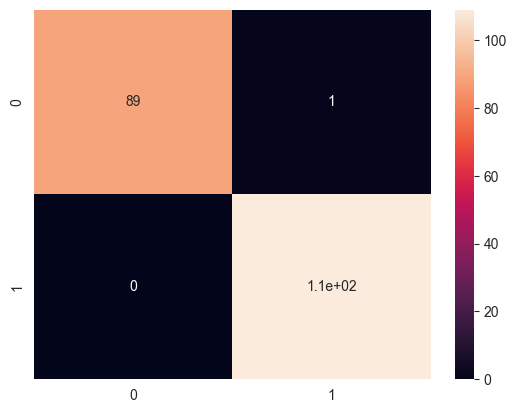

In [32]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [33]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        90
           2       0.99      1.00      1.00       109

    accuracy                           0.99       199
   macro avg       1.00      0.99      0.99       199
weighted avg       1.00      0.99      0.99       199


In [34]:
# accuracy
print("Accuracy of SVC:", svc.score(X_test, y_test))

Accuracy: 0.9949748743718593


# Conclusion
### We have trained a Support Vector Classifier to predict the current gear of the vehicle with 99% accuracy.

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train, y_train)

LogisticRegression()

In [51]:
predictions = lr.predict(X_test)

<Axes: >

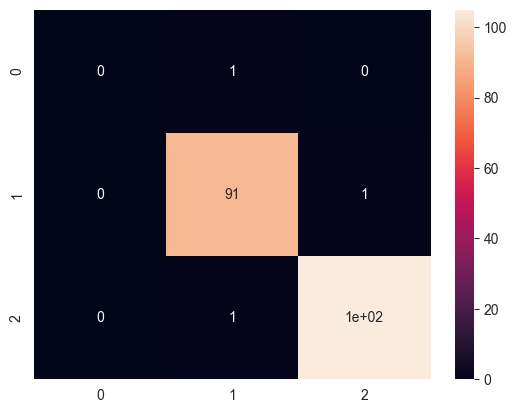

In [52]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [53]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      0.99      0.98        92
           2       0.99      0.99      0.99       106

    accuracy                           0.98       199
   macro avg       0.66      0.66      0.66       199
weighted avg       0.98      0.98      0.98       199


In [55]:
# accuracy
print("Accuracy of Logistic Regression:", lr.score(X_test, y_test))

Accuracy of Logistic Regression: 0.9849246231155779


# Conclusion
### We have trained a Logistic Regression Model to predict the current gear of the vehicle with 98% accuracy.